In [1]:
import json
from itertools import chain
from collections import defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt

total number of ImageId :  85638
Found 76 attribute categories with >= 1000 training instances
[('white', 105812), ('black', 68188), ('green', 50818), ('blue', 49490), ('brown', 39639), ('red', 30157), ('gray', 25473), ('large', 22254), ('small', 18473), ('wood', 17224), ('yellow', 17150), ('tall', 11773), ('metal', 11624), ('orange', 11403), ('long', 9430), ('dark', 9142), ('silver', 9121), ('pink', 8265), ('standing', 7289), ('clear', 7263), ('round', 5861), ('glass', 5676), ('open', 5564), ('short', 4879), ('sitting', 4854), ('parked', 4780), ('plastic', 4325), ('walking', 4272), ('brick', 4034), ('tan', 3870), ('purple', 3710), ('striped', 3462), ('colorful', 2994), ('cloudy', 2899), ('concrete', 2808), ('hanging', 2773), ('bare', 2635), ('blond', 2618), ('young', 2567), ('empty', 2556), ('old', 2423), ('baseball', 2411), ('closed', 2381), ('happy', 2127), ('bright', 2048), ('wet', 2021), ('gold', 1978), ('smiling', 1942), ('stone', 1933), ('light', 1760), ('dirty', 1664), ('flying

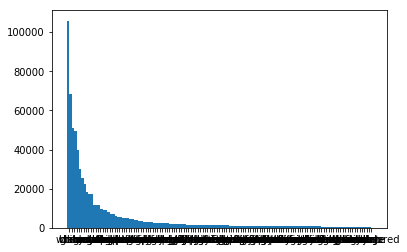

In [4]:
def json_load(file_dir):
    with open(file_dir, 'r') as f:
        data = json.load(f)
    return data

def json_save(data, file_dir):
    with open(file_dir, 'w') as f:
        json.dump(data, f)

def get_object_id(graph):
    # input graph : dictionary
    # return object id :  dictionary
    #   key : Object Id, value : Object Name
    object_dict = {}
    for imgID in graph.keys():
        image = graph[imgID]
        objects = image["objects"]
        for object_id in objects.keys():
            object_name = objects[object_id]["name"]
            object_dict[object_id] = object_name

    return object_dict

def get_whole_relation_graph(graph, id_dict):
    ##### input
    # graph : dictionary
    # id_dict : dictionary
    ##### output
    # relation_dict : dictionary
    #   key : object name
    #   value : dictionary
    #               key : target object name
    #               value : relation name
    relation_dict = {}
    attribute_name_counter = Counter()
    for imgID in graph.keys():
        img = graph[imgID]
        objects = img["objects"]
        for object_id in objects.keys():
            source_name = objects[object_id]["name"]
            relation_candidate = objects[object_id]["relations"]        # list [ {"object" : "name"} , { "object" : "name" } ,  ..... ]

            # for candidate in relation_candidate:
            #     target_id = candidate["object"]
            #     target_name = id_dict[target_id]
            #     relation =  candidate["name"]
            #
            #     # if there is no key value, add it.
            #     if source_name not in relation_dict.keys():
            #         relation_dict[source_name] = defaultdict(list)
            #
            #     #
            #     relation_dict[source_name][target_name].append(relation)
            #     relation_dict[source_name][target_name] = list(set(relation_dict[source_name][target_name]))
            names = set()
            for name in objects[object_id]["attributes"]:
                names.add(name.strip(' .').lower())
            attribute_name_counter.update(names)

    attribute_names = []
    min_attribute_instances = 1000
    for v, (name, count) in enumerate(attribute_name_counter.most_common()):
        if count >= min_attribute_instances and v < 128:
            attribute_names.append(name)
    print('Found %d attribute categories with >= %d training instances' %
          (len(attribute_names), min_attribute_instances))

    attribute_name_to_idx = {}
    attribute_idx_to_name = []
    for idx, name in enumerate(attribute_names):
        attribute_name_to_idx[name] = idx
        attribute_idx_to_name.append(name)

    print(attribute_name_counter.most_common(128))
    labels, values = zip(*attribute_name_counter.most_common(128))

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()


    return attribute_name_counter

if __name__ == '__main__':
    # 1. graph data load
    graph_data = {}
    train_graph = json_load('../sg2im/data/sceneGraphs/train_sceneGraphs.json')
    val_graph = json_load('../sg2im/data/sceneGraphs/val_sceneGraphs.json')

    graph_data.update(val_graph)
    graph_data.update(train_graph)  #최종적으로 train_graph 기준으로 dictionary가 update가 된다.

    print('total number of ImageId : ', len(list(graph_data.keys())))

    # 2. Collect object name and id -> dictionary ( key : ObjectID , value : Object Name )
    object_id_dict = get_object_id(train_graph)

    # 3. Object , relation, target 으로 dictionary 만들기.
    relation_graph = get_whole_relation_graph(graph_data, object_id_dict)